# PREDICTING TRIP DURATION USING MACHINE LEARNING

## Introduction

Machine learning systems are systems built around data to help in either understanding hidden parts or making predictions. These systems are either supervised or unsupervised. The problem domain determines the type of systems to implement in a given scenario. The type of the outcome variable also dictates whether to implement regression-based systems or classification-based systems.

These systems can be applied in various industries like the banking industry to predict churn rate, they can be employed in the stock exchange to predict stock prices based on historical data, they can be used in the health-care industry to predict the occurrence of a disease like heart disease based on the characteristics of a patient, they can be used to understand complex relations in massive data collected by meteorological department among other applications.

The quality of these systems largely depends on the quality of the data used to train them. Therefore, it’s paramount to ensure that the data sets used in the building of these systems is of high quality. Proper checks should be done before doing the actual construction of the model.

This report will cover supervised machine learning methods because of the nature of the data set used.


## Big Data for Machine Learning

**Data description and pre-processing considerations**

The data set for this project was obtained from ‘https://www.kaggle.com/datasets/fatihb/citibike-sampled-data-2013-2017’
The data set contains information on Citi Bike users/customers in relation to how long they take in riding the bike, the start and end stations among other key information like their gender and year of birth. This kind of data set is suitable for the task of machine learning because it has the structure required by most of the machine learning algorithms.

The data set contains 473556 observations and 16 columns or features. The number of observations is almost 500,000 therefore, it can be considered as big data. The main columns of interest in the context of machine learning will be trip duration, user type, age of the user, and gender of the user. The target variable is the trip duration.

Other columns in the data set are; tripduration, starttime, stoptime, start_station_id, start_station_name, start_station_latitude, start_station_longitude, end_station_id, end_station_name, end_station_latitude, end_station_longitude_, bikeid, usertype, birth_year, gender and customer_plan.

Machine learning systems are broadly classified into supervised and unsupervised. Supervised learning systems refer to systems where we observe an outcome variable for instance trip duration while in un-supervised systems, there is no outcome variable to observe. The intent is to understand patterns rather than prediction.

For supervised systems, the nature of the outcome variable determines whether classification methods or regression methods should be performed. When the outcome variable is continuous, regression techniques are carried out while when the outcome variable is categorical/binary then classification techniques are conducted.
The current data set is appropriate for regression-based machine learning systems because there is a supervising outcome variable (trip duration) which is continuous.

Pre-processing is an important preliminary stage in any machine learning system. The quality of the available features should be thoroughly checked prior to fitting any statistical models. Missing data and other data inconsistencies should be addressed. New columns can be created based on the existing ones and certain columns can be combined to form new ones.
The scale of measurements should also be put into consideration. If the variables differ so much in their scales then proper scaling should be done prior to implementing any machine learning system. The only pre-processing needed is the creation of age column given birth year and the current year and conversion of character columns into their numeric equivalent and since age and the other two variables will be on different scales, scaling of features needs to be performed. Missing values will be removed. In instances where removing missing values can lead to significant loss of data, various imputation methods have been postulated.

Common imputation methods include replacing missing values with the average of the non-missing values. Other data anomalies like outliers can also be looked into if their presence is likely to bias the results of the learning method. Outliers are values that are very extreme on either end and therefore not likely to be associated with the rest of the values. There are sometimes called influential points.


## Acquiring data and pre-processing

In [147]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import datetime
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#options
np.set_printoptions(precision=2)

os.chdir("E:/Tasks/Bon/task1")

citibike = pd.read_csv('citibike-trips.csv')

citibike.shape

(473556, 16)

In [117]:
#change character columns to numeric using one-hot encoding

citibike2 = citibike[['tripduration','gender','usertype','birth_year']]
citibike2 = citibike2[citibike.gender.isin(['female','male'])]
citibike2 = citibike2.dropna()


clean_df = pd.get_dummies(citibike2, columns = ['gender', 'usertype'])

print(clean_df.head(3))

   tripduration  birth_year  gender_female  gender_male  usertype_Customer  \
0          2319      1972.0              0            1                  0   
1           313      1968.0              1            0                  0   
2           798      1991.0              0            1                  0   

   usertype_Subscriber  
0                    1  
1                    1  
2                    1  


In [142]:
#check that missing values have been exclude

clean_df.isna().sum()

tripduration           0
birth_year             0
gender_female          0
gender_male            0
usertype_Customer      0
usertype_Subscriber    0
age                    0
dtype: int64

In [120]:
#create the age column

clean_df['age'] = datetime.date.today().year - clean_df.birth_year
clean_df['age'] = clean_df['age'].astype(int)

clean_df.head(3)

,tripduration,birth_year,gender_female,gender_male,usertype_Customer,usertype_Subscriber,age
0,2319,1972.0,0,1,0,1,51
1,313,1968.0,1,0,0,1,55
2,798,1991.0,0,1,0,1,32


In [204]:
#create the train and test sets and do feature scaling

X = clean_df[['age','gender_female','gender_male','usertype_Customer','usertype_Subscriber']].values
y = clean_df['tripduration'].values


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 2/3, random_state = 0)

In [205]:
# Feature scaling

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test  = sc.transform(X_test)

## Architecture

The machine learning architecture defines the various components involved in the machine learning life-cycle and consists of the major steps being carried out in the acquisition of raw data, it’s transformation into training data sets capable for enabling the decision making process.

This report follows five steps in its architecture. The five steps are data acquisition, data pre-processing, data modeling, execution and deployment of the system. Feature engineering is also a core component of the architecture, though at times it’s combined with data pre-processing. Feature engineering involves creation of new various from the existing ones by applying specific computations. These new derived variables can be used as features in the model instead of using the original values in the data set. A good example is deriving someone’s age from the birth date provided in the original data. Age may be more appropriate to be used a feature instead of using date of birth directly.

The architecture of this system stems from a broader system of regression techniques. The design considerations considered includes accuracy/root mean square error, usability and consistency with other commonly available systems. This system can be applied in the sports industry to predict duration time taken by bike users based on for example their age.

A number of regression systems have been postulated in the literature; these includes, the multiple linear regression, the polynomial regression, the support vector regression, the decision tree regression, the random forest regression among others.
Various regression models will be tried on the data and the best one will be selected based on root mean square error.


## Visualization of the data

‘A picture is worth more than a thousand words’.

Visualizations are key in uncovering patterns in any given data set.
Visualizations can reveal hidden patterns in the data and they can also reveal associations between variables. This can be useful at a later stages like the modeling stage.

The nature of a variable determines the type of visualization that best presents it. Continuous variables like trip duration are best presented with histograms while categorical variables like gender are best presented using bar charts.


**Distribution of trip duration**

Because of the highly skewed nature of the trip duration variable, its logarithm transformation is used for visualization purposes.

In [160]:
pd.options.display.float_format = '{:.2f}'.format
clean_df[['tripduration']].describe()

,tripduration
count,416667.00
mean,814.98
std,5434.33
min,60.00
25%,368.00
50%,587.00
75%,955.00
max,1969746.00


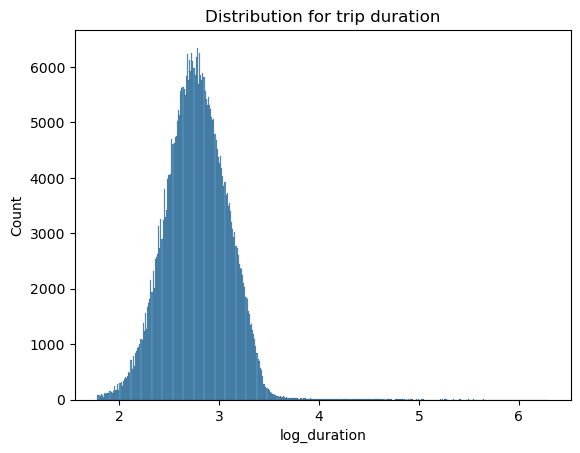

In [148]:
clean_df['log_duration'] = np.log10(clean_df['tripduration'])

sns.histplot(data = clean_df, x = "log_duration").set(title = "Distribution for trip duration");

The minimum duration time is 60 mins, the maximum duration time is 1,969,746 minutes, the median duration time is 633 minutes and the average duration time is 944.2 minutes.

**Distribution of gender**

In [152]:
citibike2['gender'].value_counts()

male      315800
female    100867
Name: gender, dtype: int64

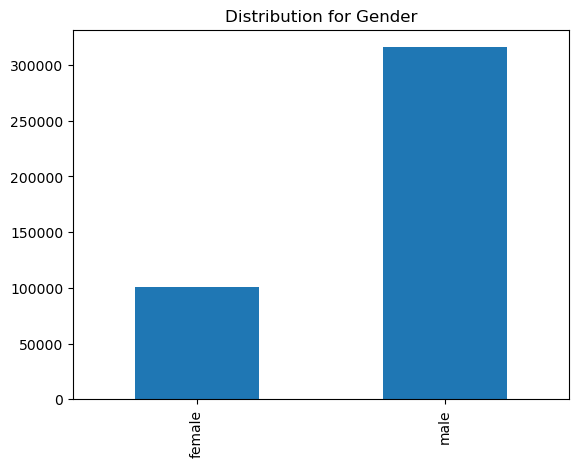

In [154]:
citibike2['gender'].value_counts().sort_values().plot(kind = 'bar').set(title = "Distribution for Gender");

A total of 100,871 (21.3%) users were females and a total of 315,807 (66.69%) users were males. 56,878 (12.01%) users did not reveal their gender. In general there are more male bike users as compared to female bike users.

**Distribution of user type**

In [155]:
citibike2['usertype'].value_counts()

Subscriber    413259
Customer        3408
Name: usertype, dtype: int64

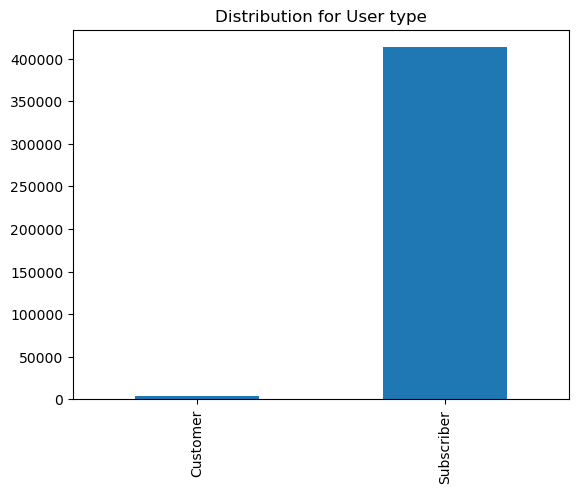

In [156]:
citibike2['usertype'].value_counts().sort_values().plot(kind = 'bar').set(title = "Distribution for User type");

A total of 57,086 (12.05%) users are customers while a total of 416,470 (87.95%) users are subscribers. In general, there are more subscribers than customers among bike users.

## Machine learning System Application

**Multiple linear regression**

Multiple linear regression is the most prevalent technique used to predict a numeric continuous outcome given multiple features/independent variables.

Its a natural extension of the simple linear regression model which uses only one independent variable to predict a dependent variable. The parameters are estimated based on the method of least squares. The significance of these parameter estimates are usually assessed based on p-values given a certain level of significance. If the p-value of a particular estimate is less than the provided significance level then its concluded that the estimate is statistically significant.

To be able to compute the root mean square and evaluate the performance of a regression model, it’s prudent to split the available data into training and test data sets. This eliminates bias as the model is built and tested on different sets of data.

In [199]:
#Use stats model to get parameter estimates

import statsmodels.api as sm 

X2 = clean_df[['age','gender_female','gender_male','usertype_Customer','usertype_Subscriber']]
y2 = clean_df['tripduration']

X2   = sm.add_constant(X2) 
est = sm.OLS(y2, X2).fit() 
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           tripduration   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     227.0
Date:                Sun, 09 Apr 2023   Prob (F-statistic):          3.47e-147
Time:                        19:46:47   Log-Likelihood:            -4.1744e+06
No. Observations:              416667   AIC:                         8.349e+06
Df Residuals:                  416663   BIC:                         8.349e+06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 974.0431     28.047     34.729      0.000     919.071    1029.015
age                     1.1695      0.727      1.610      0.107      -0.255       2.593
gender_female         551.7462     17.400     31.710      0.000     517.643     585.849
gender_male           422.2969     16.860     25.048      0.000     389.252     455.342
usertype_Customer    1659.2697     58.499     28.364      0.000    1544.614    1773.925
usertype_Subscriber  -685.2266     36.670    -18.687      0.000    -757.098    -613.355
==============================================================================
Omnibus:                  2120442.756   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):   84748093523286.125
Skew:                         229.900   Prob(JB):                         0.00
Kurtosis:                   69869.121   Cond. No.                     2.09e+18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.11e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

	The effect of age is not statistically significant and positive (beta = -1.1695, p < .001).
	The effect of usertype - Customer is statistically significant and positive (beta = 1659.2697, p < .001).
	The effect of usertype - Subscriber is statistically significant and negative (beta = -685.2266, p <.001).
    The effect of gender - male is statistically significant and positive (beta = 422.2969, p < .001).
    The effect of gender - female is statistically significant and positive (beta = 551.7462, p < .001).

The value of adjusted $R^2$ is 0.002. This explains the amount of variation explained by the model. This means that multiple linear regression model explains .2% which is very weak so other models are considered below.


In [206]:
#use sckit learn in order to consistent with other machine learning systems

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [207]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[758.4   86.  ]
 [878.13 565.  ]
 [758.09 457.  ]
 ...
 [758.54 227.  ]
 [758.75 193.  ]
 [759.31 600.  ]]


In [208]:
from sklearn.metrics import mean_squared_error

rms = round(mean_squared_error(y_test, y_pred, squared=False),2)
rms

4913.29

The root mean square value is 4913.29

**Decision tree regression**

Decision tree regression is a type of algorithm in machine learning systems that uses decisions as the features to represent the result in the form of a tree-like structure. It is a common tool used to visually represent the decisions made by the algorithm.

The results of fitting a decision tree algorithm to the bike data set are shown below.


In [211]:
from sklearn.tree import DecisionTreeRegressor
regressor2 = DecisionTreeRegressor(random_state = 0)
regressor2.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [212]:
y_pred = regressor2.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[ 711.78   86.  ]
 [1074.7   565.  ]
 [ 678.01  457.  ]
 ...
 [ 705.7   227.  ]
 [ 796.48  193.  ]
 [ 843.12  600.  ]]


In [213]:
rms = round(mean_squared_error(y_test, y_pred, squared=False),2)
rms

5010.38

The value of root mean square error is 5010.38

**Random Forest regression**

When multiple decision trees are used to predict the target variable, the algorithm is called a random forest regression algorithm. The number of trees can impact on the speed of the process of fitting the algorithm, therefore a relatively low number is chosen to avoid this complexity.

The results of the random forest algorithm are shown below.


In [214]:
from sklearn.ensemble import RandomForestRegressor
regressor3 = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor3.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=0)

In [215]:
y_pred = regressor3.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[ 714.65   86.  ]
 [1111.38  565.  ]
 [ 683.03  457.  ]
 ...
 [ 709.68  227.  ]
 [ 830.89  193.  ]
 [ 855.01  600.  ]]


In [216]:
rms = round(mean_squared_error(y_test, y_pred, squared=False),2)
rms

4955.48

The value of root mean square error is 4955.48

## Conclusion and Reflection

In this report, three machine learning systems were considered. All the three systems all predict a continuous variable and therefore they fall under the broader category of supervised methods and more in particular regression techniques.

There are so many regression techniques that can help in predicting a continuous variable, however only three were considered in this report; multiple linear regression, decision tree regression and random forest regression.

For this particular report, decision tree regression was performed. The data was first processed then split into two sets, the training and the test sets in order to evaluate the performance.

To evaluate the performance of these systems, the RMSE performance metric was used. The lower the value of RMSE the better the model compared to other models/systems. The best model was found out to be the random forest regression model with an RMSE value of 4955.48.

It has been observed that before building any machine learning system it’s prudent for one to familiarize themselves with the structure of the data set first. Knowing the structure of the data set helps in deciding which kind of system to implement. Unsupervised systems are best suited for situations where an understanding into the underlying structure is needed and relationships between variables is also needed. Methods like principal component analysis can help in such scenarios.

A number of things can be made to improve the performance of this machine learning system, these include, model tuning to find the best parameters, increase the number of features used in model training and explore other regression techniques not covered here like the use of neural networks which can perform well in the settings of big data.